All the modules, constant, imports and libraries used in this program

<br> CONSTANTS:
<ol>
<li>The input files given</li>
<li>The classes present mapped as integers for the confusion matrix</li>
<li>The percentage of data to be split into test and train</li>
<li>The number of neighbors considered for the KNN algorithm</li>
</ol>



In [239]:
import numpy as np
import pandas as pd
from random import randint
from KNN import KNearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

FILE_INPUT = {'IRIS':'iris.csv', 'MNIST':'mnist_test.csv'}
MAPPING_CLASSES = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
PERCENTAGE_TEST_DATA = 0.20
NEIGHBORS = 5

#### Read a given csv file

This function reads the input file: <ol>
<li>Takes the input file path</li>
<li>The columns name if not present in the file</li> 
</ol>
Returns: 
<ol>
<li>The pandas data frame</li>
</ol>

In [240]:
def read_file(file:str, columnsName:list[str]=None)->pd.DataFrame:
    """ _summary_
    Args:
        file: the file path
        columnsName: the header of the file if not present
    Returns:
        :returns: pandas dataFrame with the given header
    """
    return pd.read_csv(file, header=None if columnsName else 0, names=columnsName if columnsName else None)

#### Random index generator 
Given the number of index you want to be generated it creates them <br> 
bounded by the upper limit and the lower limit (0 if not present)
<br>
Returns:
- The list of random indexes 

In [241]:
def generateRandomIndex(num:int, upperLimit:int, lowerLimit:int=0)->set[int]:
    """generates num random integers between <br>
    a given upper limit and an optional lower limit
    Args:
        num : the number of numbers you want to be generated
        upperLimit : the upper limit of the number to be generated
        lowerLimit : the lower limit of the number to be generated. Defaults to 0
    Returns:
        pd.dataFrame: the set of random numbers created
    """
    numbers = set()
    i=0
    while i < num:
        gen = randint(lowerLimit, upperLimit)
        if gen not in numbers:
            numbers.add(gen)
            i += 1
    
    return numbers
    # May not be of len equal to num due to duplicates
    #return {randint(lowerLimit, upperLimit) for _ in range(num)}

#### Split array

Splits an array into values and labels to be used for KNN
<ol>
<li>All the given data of the data frame</li>
<li>The indexes of the data chosen to be into the training set</li>
</ol>
Returns:
<ol>
<li>The np.array (matrix) containing the values</li>
<li>The np.array (vector) containing the label associated to said values</li>
</ol>

In [242]:
def createSplitArray(data:pd.DataFrame, indexes:list[int])->[np.dtypes.Float16DType, np.dtypes.StringDType]: # type: ignore
    """_summary_

    Args:
        data (pd.DataFrame): the data frame
        indexes (list[int]): list of indexes you want to work on

    Returns:
        np.dtypes.Float16DType: the array of the values selected
        np.dtypes.StringDType: the class associated to the selected values 
    """
    val = np.zeros((len(indexes), len(data.columns)-1), dtype=np.dtypes.Float16DType)
    classes = np.zeros(len(indexes), dtype=np.dtypes.StringDType)
    
    for i in range(len(indexes)):
        val[i] = np.array([float(data.values[indexes[i]][j]) for j in range(len(data.values[indexes[i]])-1) ] , dtype=np.dtypes.Float16DType)
        classes[i] = data.values[indexes[i]][-1]
    
    return val, classes

### CONFUSION MATRIX CREATION

This function creates the confusion matrix starting from the correct vector and the predicted vector by our model

In [243]:
def confusion_matrix(correct:np.dtypes.Int16DType, predict:np.dtypes.Int16DType)->np.dtypes.Int16DType:
    """_summary_

    Args:
        correct (np.dtypes.Int16DType): correct classes for the given data
        predict (np.dtypes.Int16DType): predicted classes for the given data

    Returns:
        matrix (np.dtypes.Int16DType): the confusion matrix created
    """
    
    values = np.zeros((len(MAPPING_CLASSES), len(MAPPING_CLASSES)))
        
    for i in range(len(correct)):
        values[MAPPING_CLASSES[correct[i]], MAPPING_CLASSES[predict[i]]] +=1
        
    return values

### CONFUSION MATRIX PLOTTING  

This function plots the confusion matrix on screen (both the theoretical and actual) and evaluates the final accuracy of the model

In [244]:
def plot(confusion_matrix:np.dtypes.Int16DType)->float:
    """_summary_

        Plots the confusion matrix and returns the model accuracy
    
    Args:
        confusion_matrix (np.dtypes.Int16DType): the confusion matrix as a numpy 2D array

    Returns:
        accuracy (float): the final accuracy of the model
    """
    # Create the heatmap with both annotations
    plt.figure(figsize=(7, 7))
    sns.set(font_scale=2)
    x = sns.heatmap(confusion_matrix, 
                    annot=False, fmt='d', cmap='Blues', xticklabels=MAPPING_CLASSES.keys(), yticklabels=MAPPING_CLASSES.keys(), cbar=False, linewidths=2, linecolor='black')
     
    for i in range(len(MAPPING_CLASSES)):
        for j in range(len(MAPPING_CLASSES)):
            x.text(j + 0.5, i + 0.2, f"\n\n{confusion_matrix[i][j]}", 
                    ha='center', va='center', color='black', fontsize=25, weight='bold')
    
    plt.xlabel('Actual Values', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'blue'})
    plt.ylabel('Predicted Values', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'blue'})
    plt.title('Confusion Matrix', fontdict={'fontsize': 24, 'fontweight': 'bold', 'color': 'red'})
    plt.show()
    
    return round(100.0*np.trace(confusion_matrix) / np.sum(confusion_matrix), 4)

#### Main function

This is the main function of the program:
<ol>
<li>Reads the iris.csv dataset into a pandas dataFrame</li>
<li>Selects randomly x% of our N data </li>
<li>Creates the train array portioning the data given</li>
<li>Creates the test array from the other portion of the data given</li>
<li>Creates the classes used for the KNearestNeighbors algorithm</li>
<li>"Trains" the algorithm on the given data</li>
<li>Predicts the outcome class of the test set</li>
<li>Evaluate and prints the final accuracy of the model</li>
<ol>

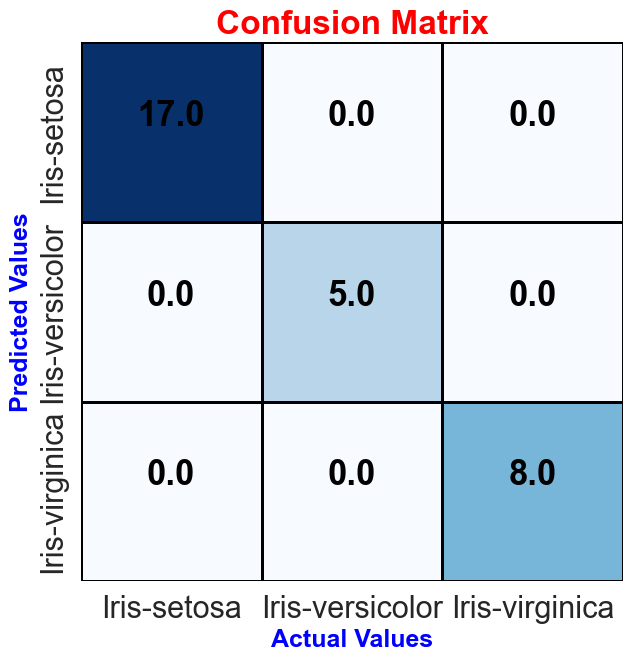

Accuracy of our model Acc = 100.0


In [245]:
def main() -> None:
    iris = read_file(FILE_INPUT['IRIS'], ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
    randomIndex = generateRandomIndex(int(PERCENTAGE_TEST_DATA*len(iris)), len(iris)-1)
    X_test, Y_test = createSplitArray(iris, sorted(randomIndex))
    X_train, Y_train = createSplitArray(iris, sorted(set(list(range(len(iris)))).difference(randomIndex)))
    
    knn = KNearestNeighbors(NEIGHBORS)
    knn.fit(X_train, Y_train)    
    predicted = knn.predict(X_test, knn.manhattan)
    acc = plot(confusion_matrix(Y_test, predicted))
    
    print(f"Accuracy of our model Acc = {acc}")
    
    
    
main()